### Paso 1: Habilitar acceso IMAP y generar credenciales

Lo primero que se debe realizar es habilitar el acceso IMAP en [Gmail](https://mail.google.com/mail/u/0/#settings/fwdandpop/) que nos permitirá extraer todos los correos. Para ello es se debe seleccionar la opción "Habilitar IMAP":
<br>
<img src="Habilitar_IMAP.png" width="1000px">
<br>
Lo segundo es generar una [contraseña de aplicación](https://myaccount.google.com/apppasswords) para el aplicativo Gmail
<br>
<img src="Habilitar_IMAP.png" width="1000px">
<br>

In [1]:
import imaplib
import email
import yaml

import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from email.header import decode_header

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import LinearSegmentedColormap

## Paso 1: Acceder a Gmail con las credenciales

In [145]:
with open('credenciales.yaml') as f:
    content = f.read()
my_credentials = yaml.load(content, Loader = yaml.FullLoader)
user, password = my_credentials['user'], my_credentials['password']

imap_url ='imap.gmail.com'
my_mail = imaplib.IMAP4_SSL(imap_url)
my_mail.login(user, password)

('OK', [b'agamasandro@gmail.com authenticated (Success)'])

In [146]:
# Seleccionar todos los correos de la bandeja de entrada
my_mail.select('Inbox')

('OK', [b'8922'])

In [151]:
total_correos = int(my_mail.select('Inbox')[1][0].decode('utf-8'))
total_correos

8922

## Paso 2: Obtener correos electrónicos

In [154]:
email_df = pd.DataFrame(columns=['Date','From','Subject'], index=range(total_correos,0,-1))

for i in tqdm(range(total_correos, 0, -1)):
    data = my_mail.fetch(str(i),'(UID RFC822)')
    for response_part in data:
        arr = response_part[0]
        if isinstance(arr, tuple):
            try: msg = email.message_from_string(str(arr[1],'utf-8'))
            except: msg = email.message_from_string(str(arr[1],'latin-1'))
            new_row = pd.Series({"Date":msg['Date'] , "From":msg['from'], "Subject":msg['subject']})
    email_df = email_df.append(new_row, ignore_index=True)
    
email_df = email_df.dropna(how='all').reset_index(drop=True) # Limpiar filas vacías
email_df

100%|██████████████████████████████████████████████████████████████████████████████| 8922/8922 [56:52<00:00,  2.61it/s]


Date  \
0     Wed, 14 Sep 2022 17:38:23 +0000 (UTC)   
1           Wed, 14 Sep 2022 20:37:21 +0300   
2     Wed, 14 Sep 2022 15:02:13 +0000 (UTC)   
3           Wed, 14 Sep 2022 14:02:40 +0000   
4           Wed, 14 Sep 2022 11:38:42 +0000   
...                                     ...   
8917        Fri, 04 Jan 2019 01:51:05 -0500   
8918        Fri, 04 Jan 2019 01:38:44 -0500   
8919        Fri, 04 Jan 2019 01:34:47 -0500   
8920        Fri, 04 Jan 2019 01:28:51 -0500   
8921        Sun, 11 Nov 2018 14:11:08 -0800   

                                                   From  \
0                              Rextie <info@rextie.com>   
1           "Alex from AMZScout" <support@amzscout.net>   
2                              Rextie <info@rextie.com>   
3           El equipo de Quantfury <team@quantfury.com>   
4             "AliDropship" <community@alidropship.com>   
...                                                 ...   
8917  =?UTF-8?Q?fabio=20olea?= <user.urbania@urbania...   
8918      =?UTF-8?Q?herrera?= <user.urbania@urbania.pe>   
8919        =?UTF-8?Q?remax?= <user.urbania@urbania.pe>   
8920  =?UTF-8?Q?ANTHONY=20BARRANTES?= <user.urbania@...   
8921  El equipo de la comunidad de Google <googlecom...   

                                                Subject  
0     =?UTF-8?B?8J+kqSDCoVJFQ1VFUkRB?= QUE PUEDES GA...  
1        [Workshop] 7 great product ideas to sell in Q4  
2     #RextieLover, =?UTF-8?B?YcO6bg==?= regalamos 2...  
3     =?utf-8?Q?=E2=8F=B0_=C2=A0Fusi=C3=B3n?= e\r\n ...  
4               Comfy. Helpful. With 1-3 days shipping.  
...                                                 ...  
8917  =?UTF-8?Q?=C2=A1Contactaste=20al=20anunciante=...  
8918  =?UTF-8?Q?=C2=A1Contactaste=20al=20anunciante=...  
8919  =?UTF-8?Q?=C2=A1Contactaste=20al=20anunciante=...  
8920  =?UTF-8?Q?=C2=A1Contactaste=20al=20anunciante=...  
8921  =?UTF-8?Q?Sandro=2C_aprovecha_al_m=C3=A1ximo_t...  

[8922 rows x 3 columns]

##### Como se están extrayendo una gran cantidad de correos, el proceso tiende a demorarse un poco (8922 mails ~ 57min). Por esa razón, guardamos el dataframe email_df en un csv.

In [4]:
email_df.to_csv('email_df.csv', index=False, encoding='utf-8')

In [2]:
# email_df = pd.read_csv('email_df.csv').fillna('')
# email_df.head(20)

Date  \
0   Wed, 14 Sep 2022 17:38:23 +0000 (UTC)   
1         Wed, 14 Sep 2022 20:37:21 +0300   
2   Wed, 14 Sep 2022 15:02:13 +0000 (UTC)   
3         Wed, 14 Sep 2022 14:02:40 +0000   
4         Wed, 14 Sep 2022 11:38:42 +0000   
5         Wed, 14 Sep 2022 08:01:26 +0000   
6   Wed, 14 Sep 2022 04:17:17 +0000 (UTC)   
7         Tue, 13 Sep 2022 19:01:19 -0700   
8         Tue, 13 Sep 2022 21:35:32 -0300   
9           Tue, 13 Sep 2022 22:05:03 GMT   
10        Tue, 13 Sep 2022 16:59:34 -0500   
11          Tue, 13 Sep 2022 21:27:22 GMT   
12  Tue, 13 Sep 2022 12:59:35 -0400 (EDT)   
13        Tue, 13 Sep 2022 09:29:16 -0600   
14  Tue, 13 Sep 2022 06:15:41 -0500 (CDT)   
15  Tue, 13 Sep 2022 14:33:23 +0000 (UTC)   
16        Tue, 13 Sep 2022 11:39:13 +0000   
17        Mon, 12 Sep 2022 13:06:21 -0600   
18        Mon, 12 Sep 2022 21:41:21 +0300   
19  Mon, 12 Sep 2022 15:48:43 +0000 (UTC)   

                                                 From  \
0                            Rextie <info@rextie.com>   
1         "Alex from AMZScout" <support@amzscout.net>   
2                            Rextie <info@rextie.com>   
3         El equipo de Quantfury <team@quantfury.com>   
4           "AliDropship" <community@alidropship.com>   
5                          datdata <hola@datdata.com>   
6   Cybrary Support <noreply@em4467.notifications....   
7                       YouTube <noreply@youtube.com>   
8   =?utf-8?Q?Claro_Renovaci=C3=B3n?= <newsletter@...   
9               Google <no-reply@accounts.google.com>   
10      Sandro Agama Espinoza <agamasandro@gmail.com>   
11              Google <no-reply@accounts.google.com>   
12  Interactive Brokers <noresponse@interactivebro...   
13  =?UTF-8?Q?Susana_Berga_P=C3=A9rez?=\r\n <sberg...   
14          Pluralsight <tech-skills@pluralsight.com>   
15                           Rextie <info@rextie.com>   
16          "AliDropship" <community@alidropship.com>   
17                 "Nelson Torres" <ntorres@ealde.es>   
18        "Alex from AMZScout" <support@amzscout.net>   
19                           Rextie <info@rextie.com>   

                                              Subject  
0   =?UTF-8?B?8J+kqSDCoVJFQ1VFUkRB?= QUE PUEDES GA...  
1      [Workshop] 7 great product ideas to sell in Q4  
2   #RextieLover, =?UTF-8?B?YcO6bg==?= regalamos 2...  
3   =?utf-8?Q?=E2=8F=B0_=C2=A0Fusi=C3=B3n?= e\r\n ...  
4             Comfy. Helpful. With 1-3 days shipping.  
5   =?utf-8?q?Reuni=C3=B3n_por_Zoom_hoy_mi=C3=A9rc...  
6                                     Content Updated  
7   =?UTF-8?Q?Nuevo_comentario_en_=E2=80=9CC=C3=B3...  
8   =?utf-8?B?8J+OieKcqFR1IG51ZXZvIGVxdWlwYXo=?=\r...  
9                                 Alerta de seguridad  
10                                                     
11                                Alerta de seguridad  
12  Build a Balanced Portfolio with Fractional Shares  
13  Juan, has sido elegido para recibir una Beca e...  
14  Limited Time: 50% Off Your First Month of Plur...  
15  =?UTF-8?B?8J+kqSDCoUdBTkE=?= UN DESAYUNO BUFFE...  
16       20 ways to make your first dropshipping sale  
17  =?UTF-8?Q?Pr=C3=B3ximas_CLASES_GRATUITAS_con_C...  
18  [Workshop] Start selling on Amazon with just a...  
19  =?UTF-8?B?8J+YsiA2IG1vZGFsaWRhZGVzIG3DoXM=?= r...

##### Nota:  Usando <b>msg.keys()</b> se pueden observar todos los variables posibles a extraer, la razón de por qué nos quedamos con 3 se debe a que son las que mejor se pueden explotar. Un sample de valores de todas las variables está en el archivo <b>msg_keys.txt</b>

In [7]:
# print(msg.keys())

## Paso 3: Limpieza de datos

In [8]:
def obtener_correo_de_from(x):
    x_mod = x.split('<')[-1].split('>')[0]
    return x_mod

In [9]:
def obtener_nombre_de_from(x):
    text, encoding = decode_header(x)[0]
    if not encoding and isinstance(text, str):
        text = ' '.join(text.split(' ')[:-1])
    else:
        text = text.decode('utf-8', errors='ignore')
        
    text = text.replace('"', '')
    return text

In [10]:
def limpiar_subject(x):
    if x:
        text, encoding = decode_header(x)[0]
        try:
            text = text.decode('utf-8', errors='ignore')
        except:
            pass
    else: text=x
    return text

In [11]:
email_df['Mail'] = email_df['From'].apply(lambda x: obtener_correo_de_from(x))
email_df['Name'] = email_df['From'].apply(lambda x: obtener_nombre_de_from(x))
email_df['Subject'] = email_df['Subject'].apply(lambda x: limpiar_subject(x))
email_df = email_df.drop(columns=['From'])
email_df.head()

Date  \
0  Wed, 14 Sep 2022 17:38:23 +0000 (UTC)   
1        Wed, 14 Sep 2022 20:37:21 +0300   
2  Wed, 14 Sep 2022 15:02:13 +0000 (UTC)   
3        Wed, 14 Sep 2022 14:02:40 +0000   
4        Wed, 14 Sep 2022 11:38:42 +0000   

                                          Subject                       Mail  \
0                                     🤩 ¡RECUERDA            info@rextie.com   
1  [Workshop] 7 great product ideas to sell in Q4       support@amzscout.net   
2                                  #RextieLover,             info@rextie.com   
3                                       ⏰  Fusión         team@quantfury.com   
4         Comfy. Helpful. With 1-3 days shipping.  community@alidropship.com   

                     Name  
0                  Rextie  
1      Alex from AMZScout  
2                  Rextie  
3  El equipo de Quantfury  
4             AliDropship

## Paso 4: Manipulación de datos

In [12]:
def limpiar_fecha(x):
    if ',' not in x: x = ', ' + x
    if '(' in x: x = ' '.join(x.split(' ')[:-1])
    x = ' '.join(x.split(' ')[:-1])
    return x

In [13]:
def obtener_dia(x):
    x = x.strftime('%A')
    return x

In [14]:
### Transformar Date "Wed, 14 Sep 2022 17:38:23 +0000 (UTC)" 
# Obtener columna 'H_M_S'
email_df['Date'] = email_df['Date'].apply(lambda x: limpiar_fecha(x)) # Se obtiene "Wed, 14 Sep 2022 17:38:23"
email_df['Date'] = email_df['Date'].str.split(', ').str[-1]           # Se obtiene "14 Sep 2022 17:38:23"
email_df['H_M_S'] = email_df['Date'].apply(lambda x: x[-8:])          # Se obtiene "17:38:23"

# Obtener columna 'Hour'
email_df['Hour'] = email_df['H_M_S'].apply(lambda x: x[:2]+'h-'+str(int(x[:2])+1).zfill(2)+'h')    # Se obtiene "17h-18h"

# Obtener columna 'Date'
email_df['Date'] = email_df['Date'].apply(lambda x: x[:-9] if len(x[:-9])==11 else '0'+x[:-9] )    # Se obtiene "14 Sep 2022"
email_df['Date'] = pd.to_datetime(email_df['Date'], format='%d %b %Y')                             # Se obtiene "2022-09-14"

# Obtener columna 'WeekDay'
email_df['WeekDay'] = email_df['Date'].apply(lambda x: obtener_dia(x))                             # Se obtiene "Wednesday"

email_df.head()

Date                                         Subject  \
0 2022-09-14                                     🤩 ¡RECUERDA   
1 2022-09-14  [Workshop] 7 great product ideas to sell in Q4   
2 2022-09-14                                  #RextieLover,    
3 2022-09-14                                       ⏰  Fusión   
4 2022-09-14         Comfy. Helpful. With 1-3 days shipping.   

                        Mail                    Name     H_M_S     Hour  \
0            info@rextie.com                  Rextie  17:38:23  17h-18h   
1       support@amzscout.net      Alex from AMZScout  20:37:21  20h-21h   
2            info@rextie.com                  Rextie  15:02:13  15h-16h   
3         team@quantfury.com  El equipo de Quantfury  14:02:40  14h-15h   
4  community@alidropship.com             AliDropship  11:38:42  11h-12h   

     WeekDay  
0  Wednesday  
1  Wednesday  
2  Wednesday  
3  Wednesday  
4  Wednesday

In [15]:
email_df.to_csv('email_df_final.csv', quotechar='"', sep='|', index=False, encoding='utf-8')

## Paso 5:  Plotear Word Cloud de los asuntos de los correos (columna Subject)

In [44]:
# Escalar de 0 a 1 los valores RGB
def inter_from_256(x):
    return np.interp(x=x,xp=[0,255],fp=[0,1])

# Asignar colores del logo de Gmail
# guinda (197,34,31), verde (52,168,83), azul (66,133,244), rojo (234,67,53), amarillo (251,188,4)
cdict = {'red':((0.0,inter_from_256(197),inter_from_256(197)),
               (1/5*1,inter_from_256(52),inter_from_256(52)),
               (1/5*3,inter_from_256(66),inter_from_256(66)),
               (1/5*4,inter_from_256(234),inter_from_256(234)),
               (1.0,inter_from_256(251),inter_from_256(251))),
        'green':((0.0, inter_from_256(34), inter_from_256(34)),
               (1/5*1, inter_from_256(168), inter_from_256(168)),
               (1/5*3, inter_from_256(133), inter_from_256(133)),
               (1/5*4, inter_from_256(67), inter_from_256(67)),
               (1.0, inter_from_256(188), inter_from_256(188))),
        'blue':((0.0, inter_from_256(31), inter_from_256(31)),
               (1/5*1, inter_from_256(83), inter_from_256(83)),
               (1/5*3, inter_from_256(244), inter_from_256(244)),
               (1/5*4, inter_from_256(53), inter_from_256(53)),
               (1.0, inter_from_256(4), inter_from_256(4))),}

# Crear paleta customizada de colores
gmail = LinearSegmentedColormap('gmail',segmentdata=cdict)

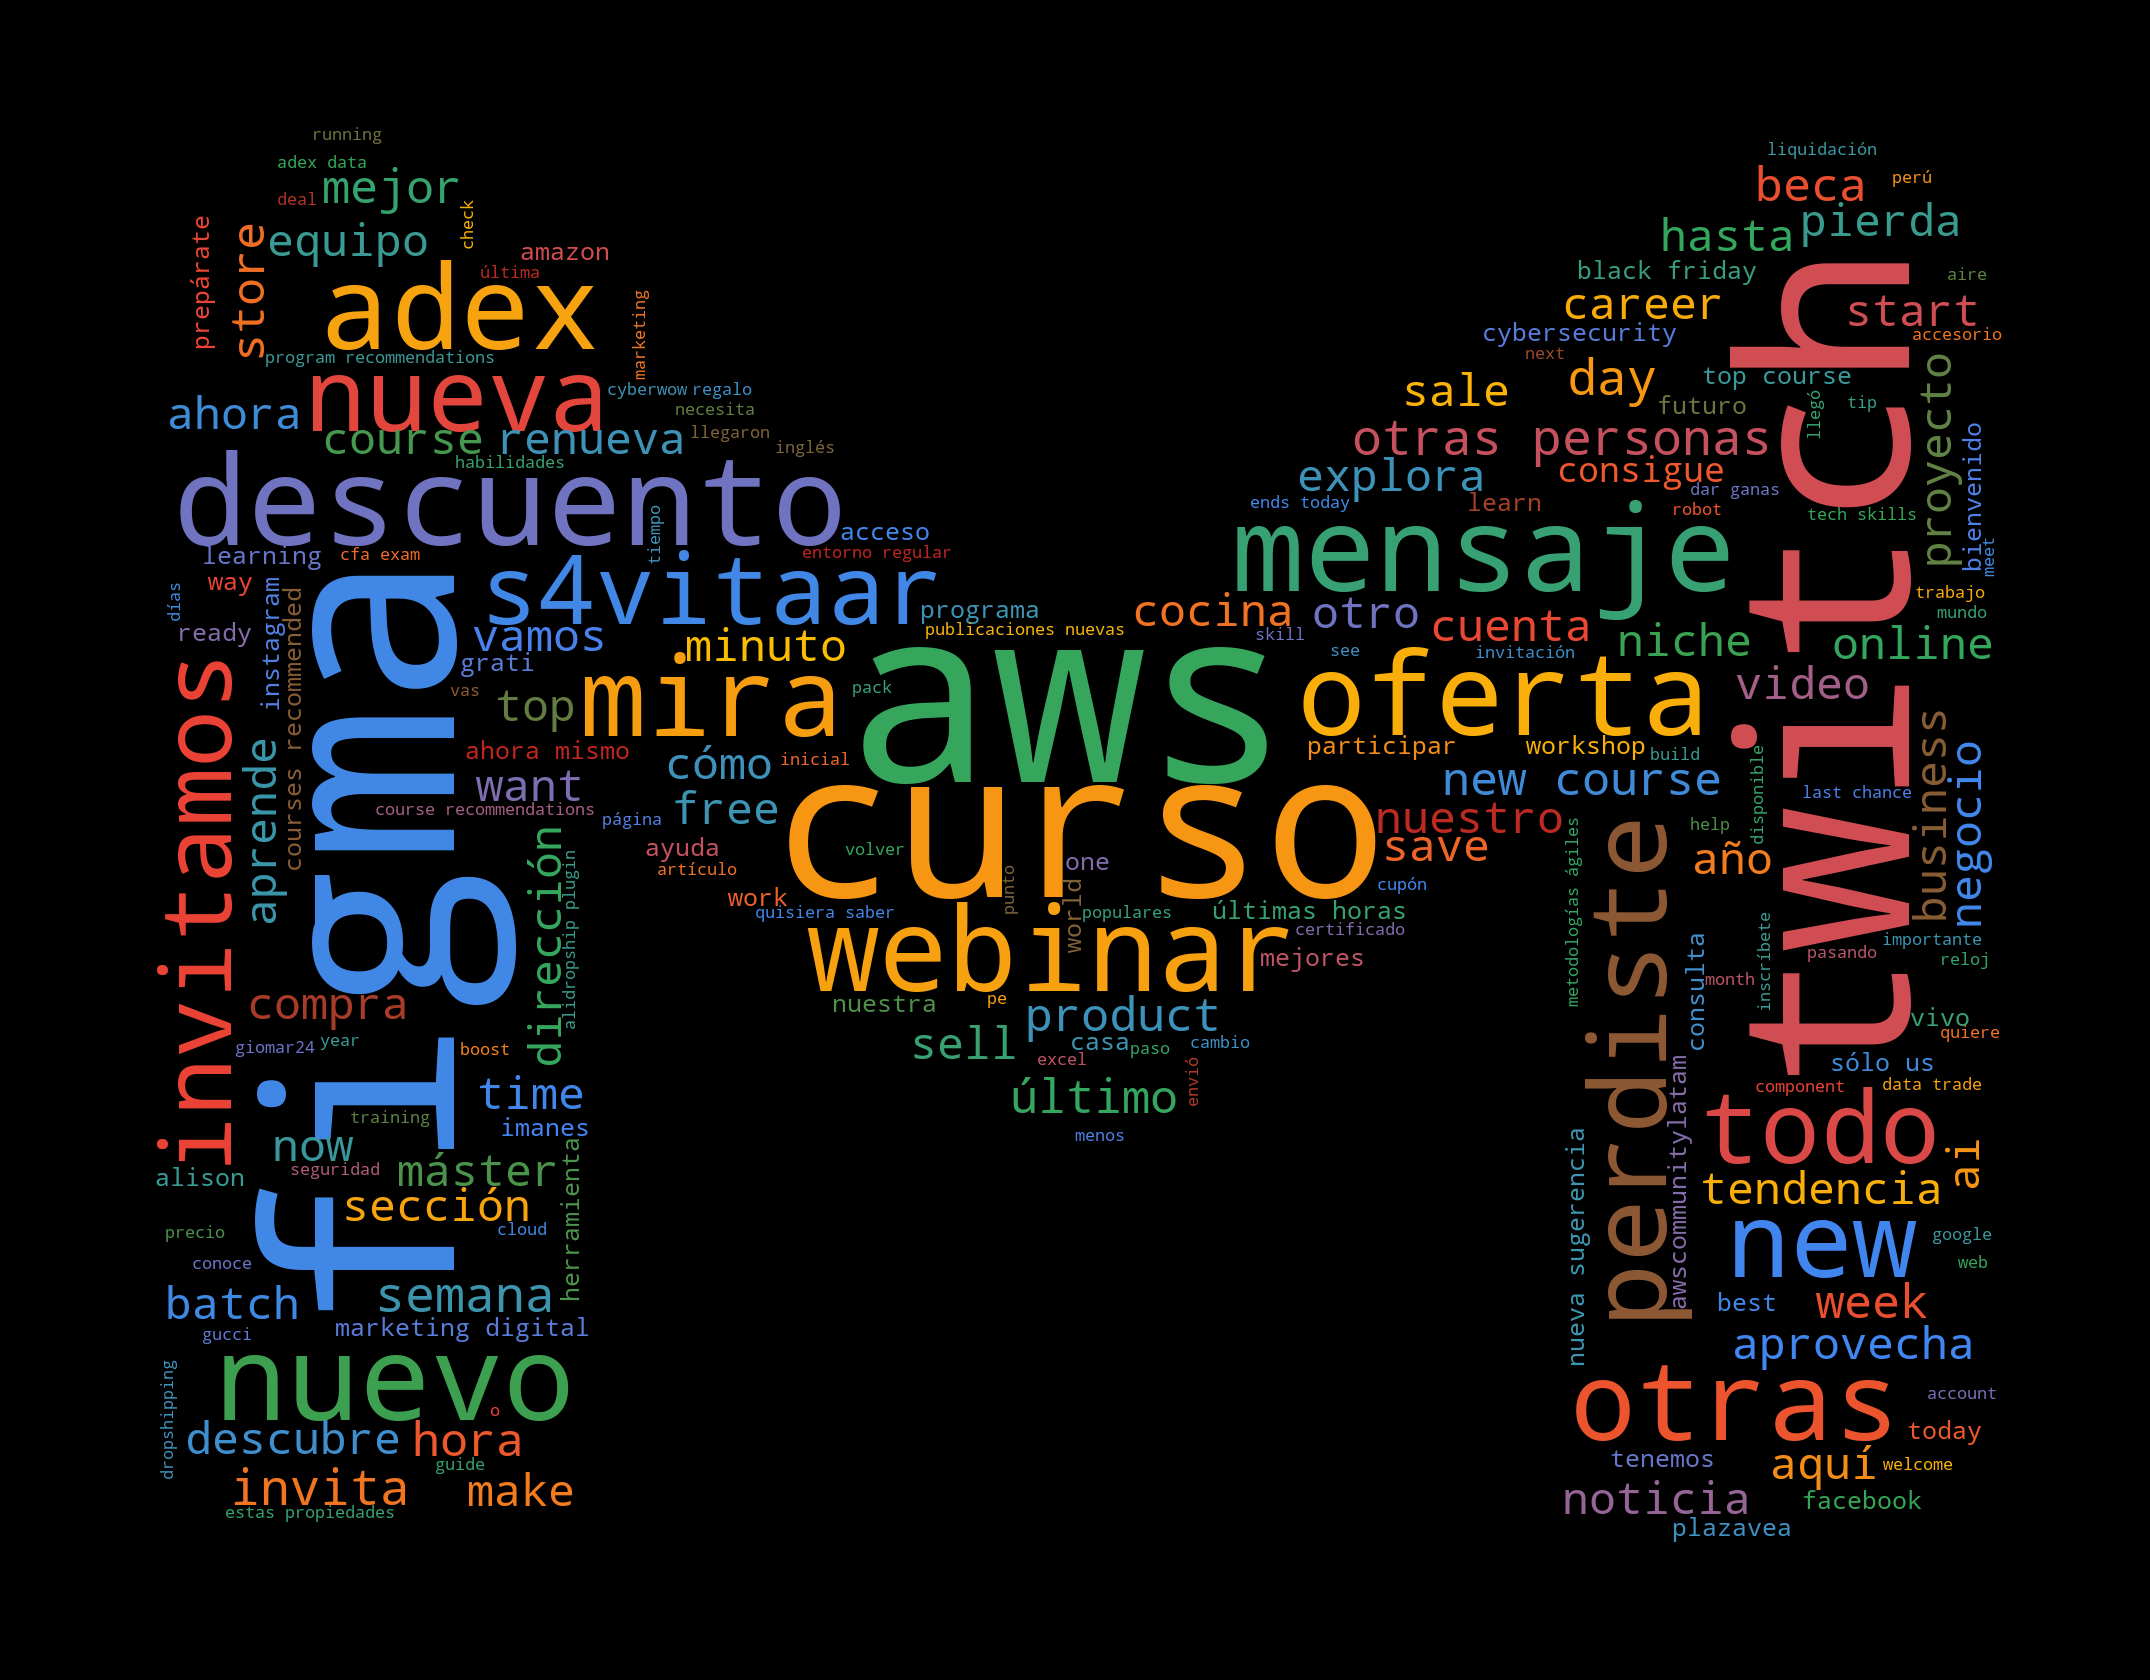

In [45]:
# Crear un string que contendrá todas las palabras
total_subjects = ' '
stopwords = STOPWORDS.update(['al','de','en','tu','s','la','y','que','te','lo','el','la','solo','del','por','qué','que','ha','desde',
                             'por','ya','más','es','con','tus','para','se','los','un','una','las','esto','va','sobre','ti','los',
                             'sandro','agama','está','tienes notificaciones','este','día','hola','hoy'])
mask = np.array(Image.open('gmail.jpg'))

# Obtener y acumular todas los subjects de los correos
for mensaje in email_df['Subject'].values:
    subjects = str(mensaje).lower().split() # Obtener las palabras en minúscula de cada subject
    for subject in subjects:
        total_subjects = total_subjects + subject + ' ' # Acumular todas los subjects

wordcloud = WordCloud(scale=2.5, width = 1000, height = 800, 
                      background_color ='black',
                      mask = mask,
                      colormap=gmail,
                      stopwords = stopwords, 
                      min_font_size = 6).generate(total_subjects) 

# Plotear la nube de palabras más usadas
wordcloud.to_image()